### Data - Marketing Campaigns from a Portuguese banking institution
### Goal - To predict if the client will subscribe a term deposit
### Algorithms used - Decision Trees with boosting, Neural Networks

In [62]:
#Importing the necessary libraries
%matplotlib inline
import os
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# EDA

In [ ]:
#Import Bank Marketing Data
os.chdir('C:\\Users\\Manan\\Desktop\\bankdata')
df = pd.read_csv('bank-full.csv')

In [3]:
#removing subscripts, split by ;, column names reassigned
def test(msg):  
    ls2 = (msg.split(';'))
    columns = []
    for i in ls2:
        columns.append(i.replace('"',""))
    return columns

name = df.columns[0]
df = df[name].str.split(';',expand=True)
df.columns = test(name)
df = df.applymap(lambda x:  x.replace('"', ''))
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2
top,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no
freq,2085,9732,27214,23202,44396,3514,25130,37967,29285,2752,13766,188,17544,36954,36954,36959,39922


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#change target column to categorical values

df['y'] = df.y.astype("category").cat.codes
df.head()
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [7]:
#OneHotEncoding
df = pd.get_dummies(df, columns=['job','marital','education','default','housing','loan','contact','month','poutcome'] )

#Shift target column to the end
df['target'] = df['y']


In [8]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,target
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
age                    45211 non-null object
balance                45211 non-null object
day                    45211 non-null object
duration               45211 non-null object
campaign               45211 non-null object
pdays                  45211 non-null object
previous               45211 non-null object
y                      45211 non-null int8
job_admin.             45211 non-null uint8
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marit

<class 'numpy.int8'>


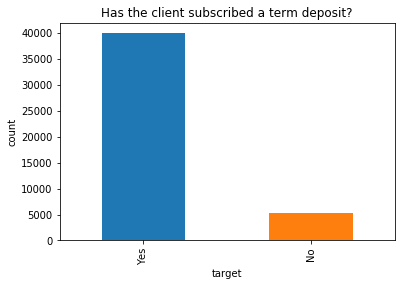

In [10]:
#Basic data exploration
plt.xlabel('target')
plt.ylabel('count')
plt.title('Has the client subscribed a term deposit?')
ax = df['y'].value_counts()[:2].plot(kind='bar')
ax.set_xticklabels(('Yes','No'))

print(type(df['y'][0]))

In [11]:
df['target'].value_counts()

0    39922
1     5289
Name: target, dtype: int64

In [12]:
df = df.drop(['y'],axis=1)

In [13]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,target
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Decision Trees

In [14]:
#Decision Tree

dtree = DecisionTreeClassifier()

X1 = df.iloc[:,0:51]
Y1 = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 20)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

dtree.fit(X_train,y_train)

predict = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print('Classification report')
print(classification_report(y_test,predict))
print('Confusion Matrix')
print(confusion_matrix(y_test,predict))

Classification report
             precision    recall  f1-score   support

          0       0.94      0.92      0.93     12006
          1       0.47      0.52      0.50      1558

avg / total       0.88      0.88      0.88     13564

Confusion Matrix
[[11101   905]
 [  741   817]]


In [15]:
d = np.arange(2,20,1)
acc_train = []
acc_test = []
for i in d:   
    dtree = DecisionTreeClassifier(criterion= "entropy", max_depth= i, random_state= 0 )
    dtree.fit(X_train, y_train)
    y_pred_train = dtree.predict(X_train)
    y_pred_test = dtree.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))

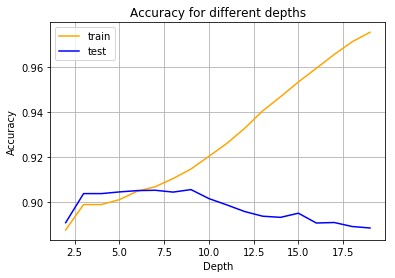

In [16]:
plt.plot(d,acc_train,color='orange',label='train')
plt.plot(d,acc_test,color='blue',label='test')
plt.title('Accuracy for different depths')
plt.grid()
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

In [17]:
print('Training Accuracy',acc_train)
print('Test Accuracy',acc_test)

Training Accuracy [0.8876038803046102, 0.8988529718456726, 0.8988529718456726, 0.901033273296047, 0.9047619047619048, 0.9067526147818119, 0.9103864505324359, 0.9146206591462066, 0.9202452049167378, 0.9259645464025026, 0.9326950421840933, 0.9403734951180207, 0.9466616108951875, 0.9532341138180555, 0.9593010395930104, 0.9654311625114544, 0.9710557082819856, 0.9752899168957563]
Test Accuracy [0.8908139191978768, 0.9037157180772634, 0.9037157180772634, 0.904452963727514, 0.9050427602477146, 0.9051902093777646, 0.904379239162489, 0.9054851076378649, 0.9015039811265113, 0.8987024476555588, 0.8957534650545562, 0.8936891772338543, 0.8931731052786789, 0.8950162194043055, 0.8906664700678266, 0.8908876437629017, 0.8891182542023002, 0.8884547331170746]


In [22]:
#Experimenting with max_depth attribute
acc_train = []
acc_test = [] 
dtree = DecisionTreeClassifier(criterion="entropy", max_depth= 10, random_state= 0)
dtree.fit(X_train , y_train)
y_pred_train = dtree.predict(X_train)
y_pred_test = dtree.predict(X_test)
acc_train.append(accuracy_score(y_train,y_pred_train))
acc_test.append(accuracy_score(y_test,y_pred_test))

In [23]:
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.92      0.97      0.95     12006
          1       0.62      0.37      0.47      1558

avg / total       0.89      0.90      0.89     13564

[[11644   362]
 [  974   584]]


In [32]:
#Pruning by setting min_samples count for our decision tree

d = np.arange(2,100,10)
acc_train = []
acc_test = []

for i in d:
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth = 10, min_samples_leaf = i+1, random_state = 0)
    dtree.fit(X_train, y_train)
    y_pred_train = dtree.predict(X_train)
    y_pred_test = dtree.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))

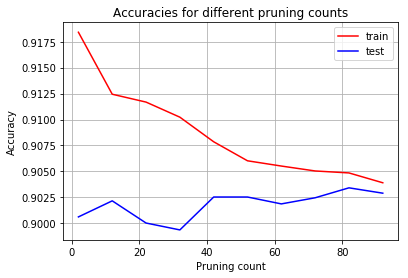

In [33]:
plt.plot(d,acc_train,color='red',label='train')
plt.plot(d,acc_test,color='blue',label='test')
plt.xlabel('Pruning count')
plt.ylabel('Accuracy')
plt.title('Accuracies for different pruning counts')
plt.grid()
plt.legend()

In [34]:
#Final Decision Tree

dtree_final = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=40, random_state=40)
dtree_final.fit(X_train, y_train)
y_pred = dtree_final.predict(X_test)

In [35]:
#Implementing 10 fold CV and finding mean accuracy of folds

from sklearn.model_selection import cross_val_score
acc_folds = cross_val_score(estimator = dtree_final, X = X_train, y = y_train, cv = 10)
mean_acc_folds = acc_folds.mean()
print('Mean Accuracy of folds',mean_acc_folds)

Mean Accuracy of folds 0.8980312261377433


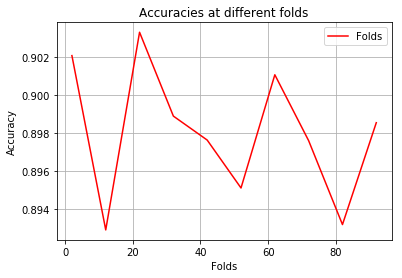

In [38]:
#Plotting the accuracies at different folds 

plt.plot(d,acc_folds,color='red',label='Folds')
plt.title('Accuracies at different folds')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
         

# AdaBoost and XGBoost Classifiers

In [39]:
#Will make use of AdaBoostClassifier - an ensemble method that builds a strong classifier by combining multiple poorly performing classifiers.

from sklearn.ensemble import AdaBoostClassifier

level = np.arange(1,100,10)
acc_train_boost = []
acc_test_boost = []

for i in level:
    dtree_boost = AdaBoostClassifier(n_estimators = i, random_state = 0)
    dtree_boost.fit(X_train,y_train)
    y_pred_train_boost = dtree_boost.predict(X_train)
    y_pred_test_boost = dtree_boost.predict(X_test)
    acc_train_boost.append(accuracy_score(y_train,y_pred_train_boost))
    acc_test_boost.append(accuracy_score(y_test,y_pred_test_boost))

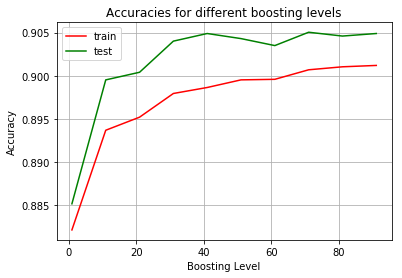

In [40]:
#Plotting the accuracies for different boosting levels

plt.plot(level,acc_train_boost,color='red',label='train')
plt.plot(level,acc_test_boost, color='green',label='test')
plt.title('Accuracies for different boosting levels')
plt.xlabel('Boosting Level')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [41]:
#Using the XGBClassifier - Gradient boosted decision trees
#Experimenting with the max_depth

from xgboost import XGBClassifier
depth = np.arange(2,20,1)
acc_train = []
acc_test = []

for i in depth:
    dtree = XGBClassifier(max_depth = i, random_state = 20)
    dtree.fit(X_train, y_train)
    y_pred_train = dtree.predict(X_train)
    y_pred_test = dtree.predict(X_test)
    acc_train.append(accuracy_score(y_train, y_pred_train))
    acc_test.append(accuracy_score(y_test, y_pred_test))

C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

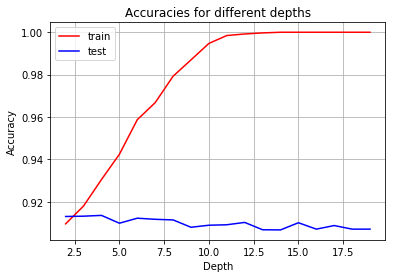

In [42]:
#Plotting accuracies for different depths

plt.plot(depth,acc_train,color='red',label='train')
plt.plot(depth,acc_test,color='blue',label='test')
plt.title('Accuracies for different depths')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [56]:
#Final Boosted Tree

dtree_boosted = XGBClassifier(max_depth=10, random_state = 20)
dtree_boosted.fit(X_train, y_train)
y_pred_test_boosted = dtree_boosted.predict(X_test)

C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [57]:
print(classification_report(y_test,y_pred_test_boosted))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95     12006
          1       0.63      0.50      0.56      1558

avg / total       0.90      0.91      0.90     13564



In [58]:
#Implementing 10 fold CV and finding mean accuracy of folds

from sklearn.model_selection import cross_val_score
acc_folds_boosted = cross_val_score(estimator = dtree_boosted, X = X_train, y = y_train, cv = 10)
mean_acc_folds = acc_folds_boosted.mean()
print('Mean Accuracy of folds',mean_acc_folds)

C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

Mean Accuracy of folds 0.9023916056210691


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


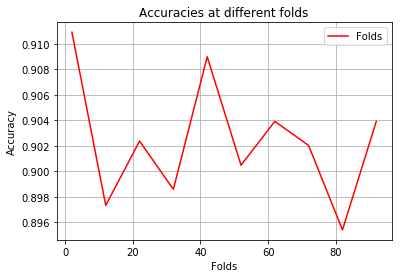

In [59]:
#Plotting the accuracies at different folds 

plt.plot(d,acc_folds_boosted,color='red',label='Folds')
plt.title('Accuracies at different folds')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

#### Conclusion

We can see that the accuracy of our classifier improved a bit when we used the AdaBoost Classifier and XGB Classifier on our decision trees. The improvement is not significant but still effective. 

## ANN - Artificial Neural Network

In [65]:
#Scale and split into train and test

X1 = df.iloc[:,0:51]
Y1 = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 20)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
#Implementing ANN by using MLP Classifier
#Experimenting with different hidden layers

#One hidden layer
from sklearn.neural_network import MLPClassifier as mlp
layer_size = np.arange(1,40,2)
acc_train = []
acc_test = []

for i in layer_size:
    ANN = mlp(hidden_layer_sizes=(i), activation='relu', alpha=0.0001, solver='adam', max_iter=200, random_state=10)
    ANN.fit(X_train, y_train)
    y_pred_train = ANN.predict(X_train)
    y_pred_test = ANN.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test, y_pred_test))

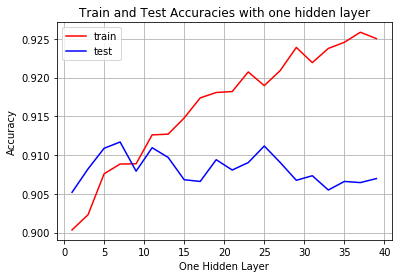

In [67]:
#Plotting train and test accuracies with one hidden layer

plt.plot(layer_size, acc_train, color='red', label='train')
plt.plot(layer_size, acc_test, color='blue', label='test')
plt.title('Train and Test Accuracies with one hidden layer')
plt.xlabel('One Hidden Layer')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

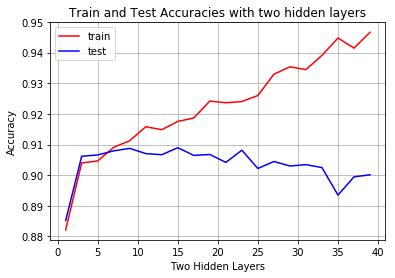

In [68]:
#Two hidden layers
layer_size = np.arange(1,40,2)
acc_train = []
acc_test = []

for i in layer_size:
    ANN = mlp(hidden_layer_sizes=(i,i), activation='relu', alpha=0.0001, solver='adam', max_iter=200, random_state=10)
    ANN.fit(X_train, y_train)
    y_pred_train = ANN.predict(X_train)
    y_pred_test = ANN.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test, y_pred_test))
    

#Plotting train and test accuracies with two hidden layers

plt.plot(layer_size, acc_train, color='red', label='train')
plt.plot(layer_size, acc_test, color='blue', label='test')
plt.title('Train and Test Accuracies with two hidden layers')
plt.xlabel('Two Hidden Layers')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

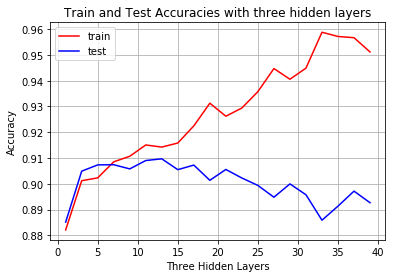

In [69]:
#Three hidden layers
layer_size = np.arange(1,40,2)
acc_train = []
acc_test = []

for i in layer_size:
    ANN = mlp(hidden_layer_sizes=(i,i,i), activation='relu', alpha=0.0001, solver='adam', max_iter=200, random_state=10)
    ANN.fit(X_train, y_train)
    y_pred_train = ANN.predict(X_train)
    y_pred_test = ANN.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test, y_pred_test))

    
#Plotting train and test accuracies with three hidden layers

plt.plot(layer_size, acc_train, color='red', label='train')
plt.plot(layer_size, acc_test, color='blue', label='test')
plt.title('Train and Test Accuracies with three hidden layers')
plt.xlabel('Three Hidden Layers')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

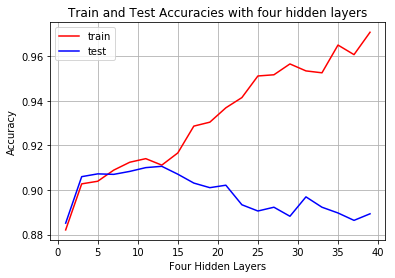

In [70]:
#Four hidden layers
layer_size = np.arange(1,40,2)
acc_train = []
acc_test = []

for i in layer_size:
    ANN = mlp(hidden_layer_sizes=(i,i,i,i), activation='relu', alpha=0.0001, solver='adam', max_iter=200, random_state=10)
    ANN.fit(X_train, y_train)
    y_pred_train = ANN.predict(X_train)
    y_pred_test = ANN.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test, y_pred_test))
    

#Plotting train and test accuracies with four hidden layers

plt.plot(layer_size, acc_train, color='red', label='train')
plt.plot(layer_size, acc_test, color='blue', label='test')
plt.title('Train and Test Accuracies with four hidden layers')
plt.xlabel('Four Hidden Layers')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [78]:
#Experimenting with different activation functions

actv_func = ['identity','logistic','tanh','relu']
acc_train_actv = []
acc_test_actv = []

for i in actv_func:
    ANN = mlp(hidden_layer_sizes=(20), max_iter=200, activation=i, random_state=20)
    ANN.fit(X_train, y_train)
    y_pred_train = ANN.predict(X_train)
    y_pred_test = ANN.predict(X_test)
    acc_train_actv.append(accuracy_score(y_train,y_pred_train))
    acc_test_actv.append(accuracy_score(y_test,y_pred_test))

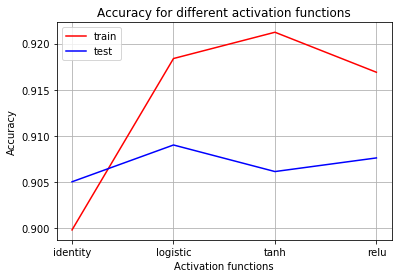

In [79]:
#Plotting the accuracy for different activation functions
plt.plot(actv_func,acc_train_actv,color='red',label='train')
plt.plot(actv_func,acc_test_actv,color='blue',label='test')
plt.title('Accuracy for different activation functions')
plt.xlabel('Activation functions')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [80]:
#Experimenting with differnet solver functions

solver = ['lbfgs','sgd','adam']
acc_train_solver = []
acc_test_solver = []

for i in solver:
    ANN = mlp(hidden_layer_sizes=(20,20,20), activation='relu', max_iter=200, solver=i, random_state=20)
    ANN.fit(X_train, y_train)
    y_pred_train = ANN.predict(X_train)
    y_pred_test = ANN.predict(X_test)
    acc_train_solver.append(accuracy_score(y_train,y_pred_train))
    acc_test_solver.append(accuracy_score(y_test,y_pred_test))

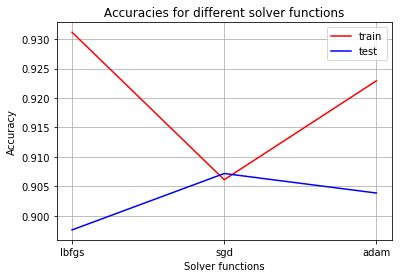

In [81]:
#Plotting the graph for the different solver functions

plt.plot(solver,acc_train_solver,color='red',label='train')
plt.plot(solver,acc_test_solver,color='blue',label='test')
plt.title(" Accuracies for different solver functions ")
plt.xlabel("Solver functions")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [82]:
#Experimenting with different Alpha values

alpha = [0.01,0.001,0.0001,0.0002]
acc_train_alpha = []
acc_test_alpha = []

for i in alpha:
    ANN = mlp(hidden_layer_sizes=(20,20,20), activation='relu', max_iter=200, alpha=i, random_state=20)
    ANN.fit(X_train, y_train)
    y_pred_train = ANN.predict(X_train)
    y_pred_test = ANN.predict(X_test)
    acc_train_alpha.append(accuracy_score(y_train,y_pred_train))
    acc_test_alpha.append(accuracy_score(y_test,y_pred_test))

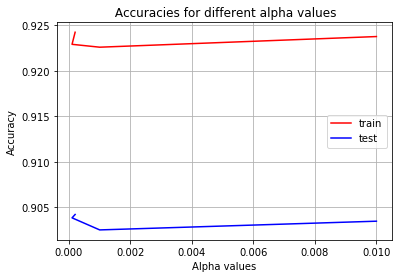

In [83]:
#Plotting the accuracies for different alpha values

plt.plot(alpha,acc_train_alpha,color='red',label='train')
plt.plot(alpha,acc_test_alpha,color='blue',label='test')
plt.title(" Accuracies for different alpha values")
plt.xlabel("Alpha values")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [91]:
#Building the final classifier
ANN = mlp(hidden_layer_sizes=(20,20,20),
                          activation='identity',  
                          batch_size='auto',
                          solver='sgd',
                          learning_rate='constant',
                          max_iter=200,
                          random_state= 20)

ANN.fit(X_train, y_train)

#Predicting the test set result
y_pred_test = ANN.predict(X_test)
#Finding the accuracy
result = accuracy_score(y_test, y_pred_test)
print('Accuracy using ANN:',result)

### create confusion matrix
cm = confusion_matrix(y_test , y_pred_test)
print('Confusion Matrix')
print(cm)

ann_acc = cross_val_score(estimator = ANN, X = X_train, y = y_train, cv = 10)
mean_ann_acc = ann_acc.mean()
print('Mean Accuracy of our model by averaging accuracies at different folds', mean_ann_acc)

Accuracy using ANN: 0.9053376585078148
Confusion Matrix
[[11704   302]
 [  982   576]]
Mean Accuracy of our model by averaging accuracies at different folds 0.8993899358361273


#### Conclusion

By comparing the accuracy obtained by the boosed decision tree classifier and the artificial neural networks, we can see that the boosted decision tree classifier has a slighlty higher accuracy than ANN's.